# MODELOS DE REDES PARA DENGUE GIRON

### Cargue de librerias requeridas

In [1]:
import pandas as pd
import numpy as np
from numpy import concatenate
from pandas import concat
from pandas import read_csv
from pandas import DataFrame
import tensorflow as tf
from tensorflow import keras
import os
import datetime
import IPython
import IPython.display
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten, LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Input, Reshape, RepeatVector, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from scipy.stats import randint as sp_randint
np.random.seed(123) # for reproducibility
import warnings
warnings.filterwarnings('ignore')

### Cargar la base de datos

In [2]:
datos = read_csv('Giron_Lags.csv', encoding='latin-1', sep=";")
datos.columns

Index(['Municipio', 'Año', 'Semana_Epi', 'Casos_Dengue',
       'Temp_Seca_Max_Dia_Prom', 'Temp_Seca_Max_Dia_Prom_1',
       'Temp_Seca_Max_Dia_Prom_2', 'Temp_Seca_Max_Dia_Prom_3',
       'Temp_Seca_Max_Dia_Prom_4', 'Temp_Seca_Max_Dia_Prom_5',
       'Temp_Seca_Max_Dia_Prom_6', 'Temp_Seca_Max_Sem', 'Temp_Seca_Max_Sem_1',
       'Temp_Seca_Max_Sem_2', 'Temp_Seca_Max_Sem_3', 'Temp_Seca_Max_Sem_4',
       'Temp_Seca_Max_Sem_5', 'Temp_Seca_Max_Sem_6', 'Temp_Seca_Min_Dia_Prom',
       'Temp_Seca_Min_Dia_Prom_1', 'Temp_Seca_Min_Dia_Prom_2',
       'Temp_Seca_Min_Dia_Prom_3', 'Temp_Seca_Min_Dia_Prom_4',
       'Temp_Seca_Min_Dia_Prom_5', 'Temp_Seca_Min_Dia_Prom_6',
       'Temp_Seca_Min_Sem', 'Temp_Seca_Min_Sem_1', 'Temp_Seca_Min_Sem_2',
       'Temp_Seca_Min_Sem_3', 'Temp_Seca_Min_Sem_4', 'Temp_Seca_Min_Sem_5',
       'Temp_Seca_Min_Sem_6', 'Prom_Dia_Preci', 'Prom_Dia_Preci_1',
       'Prom_Dia_Preci_2', 'Prom_Dia_Preci_3', 'Prom_Dia_Preci_4',
       'Prom_Dia_Preci_5', 'Prom_Dia_Preci_6', '

In [3]:
# Se eliminan las columnas de las variables que No se van a utilizar
datos = datos.drop(['Municipio', 'Año', 'Semana_Epi',
       'Temp_Seca_Max_Dia_Prom', 'Temp_Seca_Max_Dia_Prom_1',
       'Temp_Seca_Max_Dia_Prom_2', 'Temp_Seca_Max_Dia_Prom_3',
       'Temp_Seca_Max_Dia_Prom_4', 'Temp_Seca_Max_Dia_Prom_5',
       'Temp_Seca_Max_Dia_Prom_6', 'Temp_Seca_Max_Sem', 'Temp_Seca_Max_Sem_1',
       'Temp_Seca_Max_Sem_2', 'Temp_Seca_Max_Sem_3', 'Temp_Seca_Max_Sem_4',
       'Temp_Seca_Max_Sem_5', 'Temp_Seca_Max_Sem_6', 'Temp_Seca_Min_Dia_Prom',
       'Temp_Seca_Min_Dia_Prom_1', 'Temp_Seca_Min_Dia_Prom_2',
       'Temp_Seca_Min_Dia_Prom_3', 'Temp_Seca_Min_Dia_Prom_4',
       'Temp_Seca_Min_Dia_Prom_5', 'Temp_Seca_Min_Dia_Prom_6',
       'Temp_Seca_Min_Sem', 'Temp_Seca_Min_Sem_1', 'Temp_Seca_Min_Sem_2',
       'Temp_Seca_Min_Sem_3', 'Temp_Seca_Min_Sem_4', 'Temp_Seca_Min_Sem_5',
       'Temp_Seca_Min_Sem_6', 'Prom_Dia_Preci',
       'Prom_Dia_Preci_1', 'Prom_Dia_Preci_2', 'Prom_Dia_Preci_4',
       'Prom_Dia_Preci_5', 'Prom_Dia_Preci_6', 'Total_Preci_Sem',
        'Total_Preci_Sem_1', 'Total_Preci_Sem_2',
       'Total_Preci_Sem_4', 'Total_Preci_Sem_5', 'Total_Preci_Sem_6',
       'Temp_Max_Dia_Prom', 'Temp_Max_Dia_Prom_1', 'Temp_Max_Dia_Prom_2',
       'Temp_Max_Dia_Prom_3', 'Temp_Max_Dia_Prom_4', 'Temp_Max_Dia_Prom_5',
       'Temp_Max_Dia_Prom_6', 'Temp_Max_Sem', 'Temp_Max_Sem_1',
       'Temp_Max_Sem_2', 'Temp_Max_Sem_3', 'Temp_Max_Sem_4', 'Temp_Max_Sem_5',
       'Temp_Max_Sem_6', 'Temp_Min_Dia_Prom', 'Temp_Min_Dia_Prom_1',
       'Temp_Min_Dia_Prom_2', 'Temp_Min_Dia_Prom_3', 'Temp_Min_Dia_Prom_4',
       'Temp_Min_Dia_Prom_5', 'Temp_Min_Dia_Prom_6', 'Temp_Min_Sem',
       'Temp_Min_Sem_1', 'Temp_Min_Sem_2', 'Temp_Min_Sem_3', 'Temp_Min_Sem_4',
       'Temp_Min_Sem_5', 'Temp_Min_Sem_6', 'Hum_Rel_Max','Hum_Rel_Max_3',
       'Hum_Rel_Max_6', 'Hum_Rel_Min', 'Hum_Rel_Min_1', 'Hum_Rel_Min_2',
       'Hum_Rel_Min_3', 'Hum_Rel_Min_4', 'Hum_Rel_Min_5', 'Hum_Rel_Min_6',
        'Hum_Rel_Max_1', 'Hum_Rel_Max_2', 'Hum_Rel_Max_4', 'Hum_Rel_Max_5'],axis=1)
datos.columns

Index(['Casos_Dengue', 'Prom_Dia_Preci_3', 'Total_Preci_Sem_3'], dtype='object')

In [4]:
datos.isnull().sum()

Casos_Dengue         0
Prom_Dia_Preci_3     4
Total_Preci_Sem_3    4
dtype: int64

In [5]:
from sklearn.impute import KNNImputer
knnImputer = KNNImputer (missing_values=np.nan, n_neighbors=2, 
                         weights="uniform", metric="nan_euclidean")

knnImputer.fit(datos[['Prom_Dia_Preci_3']])
datos['Prom_Dia_Preci_3'] = knnImputer.transform(datos[['Prom_Dia_Preci_3']]).ravel()
knnImputer.fit(datos[['Total_Preci_Sem_3']])
datos['Total_Preci_Sem_3'] = knnImputer.transform(datos[['Total_Preci_Sem_3']]).ravel()

datos.isnull().sum()

Casos_Dengue         0
Prom_Dia_Preci_3     0
Total_Preci_Sem_3    0
dtype: int64

### División de los datos en set de entrenamiento y prueba

In [6]:
train_size = int(len(datos) * 0.7)
test_size = len(datos) - train_size
train, test = datos.iloc[0:train_size], datos.iloc[train_size:len(datos)]
print(len(train), len(test))

254 110


In [7]:
f_columns = ['Prom_Dia_Preci_3', 'Total_Preci_Sem_3']
f_transformer = MinMaxScaler(feature_range=(0, 1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())

In [8]:
dengue_transformer = MinMaxScaler(feature_range=(0, 1))
dengue_transformer = dengue_transformer.fit(train[['Casos_Dengue']])
train['Casos_Dengue'] = dengue_transformer.transform(train[['Casos_Dengue']])
test['Casos_Dengue'] = dengue_transformer.transform(test[['Casos_Dengue']])

In [9]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# MODELO LSTM

In [10]:
# Creación de X_train, y_train, X_test y y_test Para el modelo LSTM

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_LSTM, y_train_LSTM = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_LSTM, y_test_LSTM = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_LSTM.shape, y_train_LSTM.shape, X_test_LSTM.shape, y_test_LSTM.shape )

(247, 7, 3) (247,) (103, 7, 3) (103,)


### Construcción, Compilación y entrenamiento del modelo LSTM

In [11]:
Preci_Giron_LSTM_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Preci_Giron_LSTM_model_1.add(keras.layers.InputLayer(input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    
    
#CAPAS INTERMEDIAS

Preci_Giron_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Preci_Giron_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Preci_Giron_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Preci_Giron_LSTM_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Preci_Giron_LSTM_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Preci_Giron_LSTM_model_3.h5'
checkpoint_LSTM = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_LSTM = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_LSTM = Preci_Giron_LSTM_model_1.fit(X_train_LSTM,y_train_LSTM, validation_data=(X_test_LSTM,y_test_LSTM), 
                                     verbose=2, epochs=100, callbacks=[monitor_LSTM, checkpoint_LSTM])
Preci_Giron_LSTM_model_1.load_weights(model_filepath)

Epoch 1/100
8/8 - 12s - loss: 0.0917 - mse: 0.0917 - val_loss: 0.0276 - val_mse: 0.0276 - 12s/epoch - 1s/step
Epoch 2/100
8/8 - 0s - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0201 - val_mse: 0.0201 - 323ms/epoch - 40ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0135 - val_mse: 0.0135 - 297ms/epoch - 37ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0145 - val_mse: 0.0145 - 273ms/epoch - 34ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0132 - val_mse: 0.0132 - 357ms/epoch - 45ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0123 - val_mse: 0.0123 - 476ms/epoch - 60ms/step
Epoch 7/100
8/8 - 1s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0115 - val_mse: 0.0115 - 678ms/epoch - 85ms/step
Epoch 8/100
8/8 - 0s - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0138 - val_mse: 0.0138 - 370ms/epoch - 46ms/step
Epoch 9/100
8/8 - 0s - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0138 - val_mse: 0.0138 - 312ms/epoc

# MODELO CNN

In [12]:
# Creación de X_train, y_train, X_test y y_test Para el modelo CNN

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_CNN, y_train_CNN = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_CNN, y_test_CNN = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_CNN.shape, y_train_CNN.shape, X_test_CNN.shape, y_test_CNN.shape )

(247, 7, 3) (247,) (103, 7, 3) (103,)


### Construcción, Compilación y entrenamiento del modelo CNN

In [13]:
Preci_Giron_CNN_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Preci_Giron_CNN_model_1.add(keras.layers.InputLayer(input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2])))
    
    
#CAPAS INTERMEDIAS

Preci_Giron_CNN_model_1.add(keras.layers.Conv1D(220, kernel_size=2, strides=1, activation='tanh', padding='same'))
Preci_Giron_CNN_model_1.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))

Preci_Giron_CNN_model_1.add(keras.layers.Conv1D(200, kernel_size=2, strides=1, activation='tanh', padding='same'))
Preci_Giron_CNN_model_1.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))

Preci_Giron_CNN_model_1.add(Dropout(0.1))
Preci_Giron_CNN_model_1.add(Flatten())
    
Preci_Giron_CNN_model_1.add(keras.layers.Dense(units=128, activation='tanh'))
Preci_Giron_CNN_model_1.add(Dropout(0.1)) 


#CAPA DE SALIDA                 
Preci_Giron_CNN_model_1.add(Dense(1))


#COMPILACIÓN DEL MODELO
Preci_Giron_CNN_model_1.compile(optimizer='rmsprop', loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Preci_Giron_CNN_model_3.h5'
checkpoint_CNN = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_CNN = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_CNN = Preci_Giron_CNN_model_1.fit(X_train_CNN,y_train_CNN, validation_data=(X_test_CNN,y_test_CNN), 
                                     verbose=2, epochs=100, callbacks=[monitor_CNN, checkpoint_CNN])
Preci_Giron_CNN_model_1.load_weights(model_filepath)

Epoch 1/100
8/8 - 2s - loss: 0.1390 - mse: 0.1390 - val_loss: 0.0085 - val_mse: 0.0085 - 2s/epoch - 199ms/step
Epoch 2/100
8/8 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0116 - val_mse: 0.0116 - 97ms/epoch - 12ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0156 - val_mse: 0.0156 - 112ms/epoch - 14ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0087 - val_mse: 0.0087 - 103ms/epoch - 13ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0089 - val_mse: 0.0089 - 116ms/epoch - 15ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0101 - val_mse: 0.0101 - 111ms/epoch - 14ms/step


# MODELO RNN

In [14]:
# Creación de X_train, y_train, X_test y y_test Para el modelo RNN

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_RNN, y_train_RNN = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_RNN, y_test_RNN = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_RNN.shape, y_train_RNN.shape, X_test_RNN.shape, y_test_RNN.shape )

(247, 7, 3) (247,) (103, 7, 3) (103,)


### Construcción, Compilación y entrenamiento del modelo RNN

In [15]:
Preci_Giron_RNN_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Preci_Giron_RNN_model_1.add(keras.layers.InputLayer(input_shape=(X_train_RNN.shape[1], X_train_RNN.shape[2])))
    
    
#CAPAS INTERMEDIAS

Preci_Giron_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Preci_Giron_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Preci_Giron_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Preci_Giron_RNN_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Preci_Giron_RNN_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Preci_Giron_RNN_model_3.h5'
checkpoint_RNN = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_RNN = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_RNN = Preci_Giron_RNN_model_1.fit(X_train_RNN,y_train_RNN, validation_data=(X_test_RNN,y_test_RNN), 
                                     verbose=2, epochs=100, callbacks=[monitor_RNN, checkpoint_RNN])
Preci_Giron_RNN_model_1.load_weights(model_filepath)

Epoch 1/100
8/8 - 5s - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0307 - val_mse: 0.0307 - 5s/epoch - 665ms/step
Epoch 2/100
8/8 - 0s - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0182 - val_mse: 0.0182 - 187ms/epoch - 23ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0120 - val_mse: 0.0120 - 211ms/epoch - 26ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0116 - val_mse: 0.0116 - 199ms/epoch - 25ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0104 - val_mse: 0.0104 - 178ms/epoch - 22ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0131 - val_mse: 0.0131 - 128ms/epoch - 16ms/step
Epoch 7/100
8/8 - 0s - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0131 - val_mse: 0.0131 - 135ms/epoch - 17ms/step
Epoch 8/100
8/8 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0112 - val_mse: 0.0112 - 128ms/epoch - 16ms/step
Epoch 9/100
8/8 - 0s - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0109 - val_mse: 0.0109 - 127ms/epo

# MODELO GRU

In [16]:
# Creación de X_train, y_train, X_test y y_test Para el modelo GRU

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_GRU, y_train_GRU = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_GRU, y_test_GRU = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_GRU.shape, y_train_GRU.shape, X_test_GRU.shape, y_test_GRU.shape )

(247, 7, 3) (247,) (103, 7, 3) (103,)


### Construcción, Compilación y entrenamiento del modelo GRU

In [17]:
Preci_Giron_GRU_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Preci_Giron_GRU_model_1.add(keras.layers.InputLayer(input_shape=(X_train_GRU.shape[1], X_train_GRU.shape[2])))
    
    
#CAPAS INTERMEDIAS

Preci_Giron_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Preci_Giron_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Preci_Giron_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Preci_Giron_GRU_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Preci_Giron_GRU_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Preci_Giron_GRU_model_3.h5'
checkpoint_GRU = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_GRU = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_GRU = Preci_Giron_GRU_model_1.fit(X_train_GRU,y_train_GRU, validation_data=(X_test_GRU,y_test_GRU), 
                                     verbose=2, epochs=100, callbacks=[monitor_GRU, checkpoint_GRU])
Preci_Giron_GRU_model_1.load_weights(model_filepath)

Epoch 1/100
8/8 - 13s - loss: 0.0805 - mse: 0.0805 - val_loss: 0.0345 - val_mse: 0.0345 - 13s/epoch - 2s/step
Epoch 2/100
8/8 - 0s - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0164 - val_mse: 0.0164 - 442ms/epoch - 55ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0112 - val_mse: 0.0112 - 309ms/epoch - 39ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0114 - val_mse: 0.0114 - 237ms/epoch - 30ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0115 - val_mse: 0.0115 - 230ms/epoch - 29ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0096 - val_mse: 0.0096 - 302ms/epoch - 38ms/step
Epoch 7/100
8/8 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0105 - val_mse: 0.0105 - 228ms/epoch - 28ms/step
Epoch 8/100
8/8 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0098 - val_mse: 0.0098 - 233ms/epoch - 29ms/step
Epoch 9/100
8/8 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0106 - val_mse: 0.0106 - 330ms/epoc

### Graficas de función de pérdida & RMSE

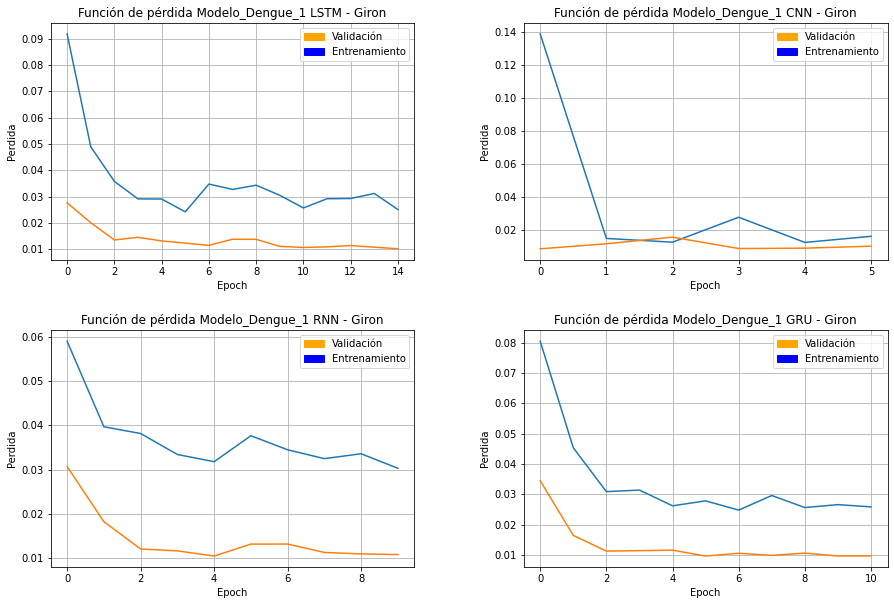

In [18]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue_1 LSTM - Giron')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])

plt.subplot(2, 2, 2)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue_1 CNN - Giron')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])

plt.subplot(2, 2, 3)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue_1 RNN - Giron')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])

plt.subplot(2, 2, 4)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue_1 GRU - Giron')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])

plt.show()

# Gráficas de dispersión

4/4 [==============================] - 2s 7ms/step


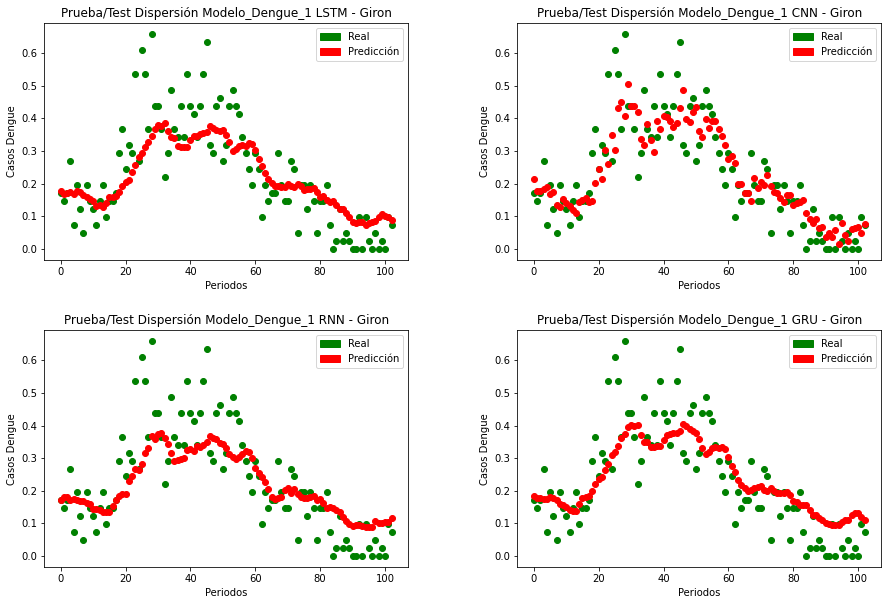

In [19]:
results_LSTM =Preci_Giron_LSTM_model_1.predict(X_test_LSTM)
results_CNN =Preci_Giron_CNN_model_1.predict(X_test_CNN)
results_RNN =Preci_Giron_RNN_model_1.predict(X_test_RNN)
results_GRU =Preci_Giron_GRU_model_1.predict(X_test_GRU)

plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue_1 LSTM - Giron')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_LSTM)),y_test_LSTM,c='g')
plt.scatter(range(len(results_LSTM)),results_LSTM,c='r')

plt.subplot(2, 2, 2)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue_1 CNN - Giron')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_CNN)),y_test_CNN,c='g')
plt.scatter(range(len(results_CNN)),results_CNN,c='r')

plt.subplot(2, 2, 3)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue_1 RNN - Giron')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_RNN)),y_test_RNN,c='g')
plt.scatter(range(len(results_RNN)),results_RNN,c='r')

plt.subplot(2, 2, 4)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue_1 GRU - Giron')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_GRU)),y_test_GRU,c='g')
plt.scatter(range(len(results_GRU)),results_GRU,c='r')

plt.show()

In [20]:
y_pred_LSTM = Preci_Giron_LSTM_model_1.predict(X_test_LSTM)
y_pred_CNN = Preci_Giron_CNN_model_1.predict(X_test_CNN)
y_pred_RNN = Preci_Giron_RNN_model_1.predict(X_test_RNN)
y_pred_GRU = Preci_Giron_GRU_model_1.predict(X_test_GRU)

y_train_inv_LSTM = dengue_transformer.inverse_transform(y_train_LSTM.reshape(1, -1))
y_train_inv_CNN = dengue_transformer.inverse_transform(y_train_CNN.reshape(1, -1))
y_train_inv_RNN = dengue_transformer.inverse_transform(y_train_RNN.reshape(1, -1))
y_train_inv_GRU = dengue_transformer.inverse_transform(y_train_GRU.reshape(1, -1))

y_test_inv_LSTM = dengue_transformer.inverse_transform(y_test_LSTM.reshape(1, -1))
y_test_inv_CNN = dengue_transformer.inverse_transform(y_test_CNN.reshape(1, -1))
y_test_inv_RNN = dengue_transformer.inverse_transform(y_test_RNN.reshape(1, -1))
y_test_inv_GRU = dengue_transformer.inverse_transform(y_test_GRU.reshape(1, -1))

y_pred_inv_LSTM = dengue_transformer.inverse_transform(y_pred_LSTM)
y_pred_inv_CNN = dengue_transformer.inverse_transform(y_pred_CNN)
y_pred_inv_RNN = dengue_transformer.inverse_transform(y_pred_RNN)
y_pred_inv_GRU = dengue_transformer.inverse_transform(y_pred_GRU)

4/4 [==============================] - 0s 7ms/step


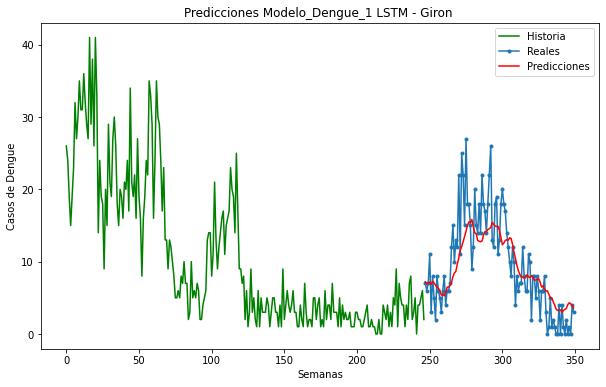

In [21]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_LSTM)), y_train_inv_LSTM.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_LSTM), len(y_train_LSTM) + len(y_test_LSTM)), y_test_inv_LSTM.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_LSTM), len(y_train_LSTM) + len(y_test_LSTM)), y_pred_inv_LSTM.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue_1 LSTM - Giron ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

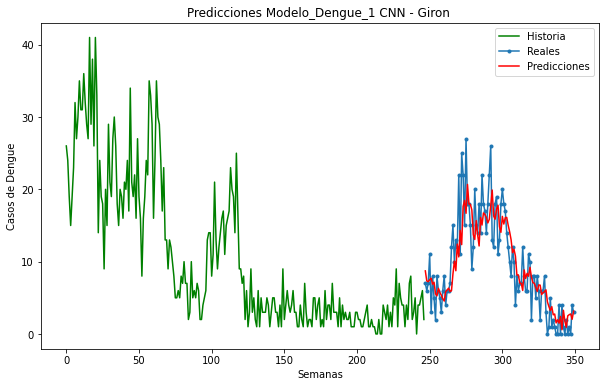

In [22]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_CNN)), y_train_inv_CNN.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_CNN), len(y_train_CNN) + len(y_test_CNN)), y_test_inv_CNN.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_CNN), len(y_train_CNN) + len(y_test_CNN)), y_pred_inv_CNN.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue_1 CNN - Giron ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

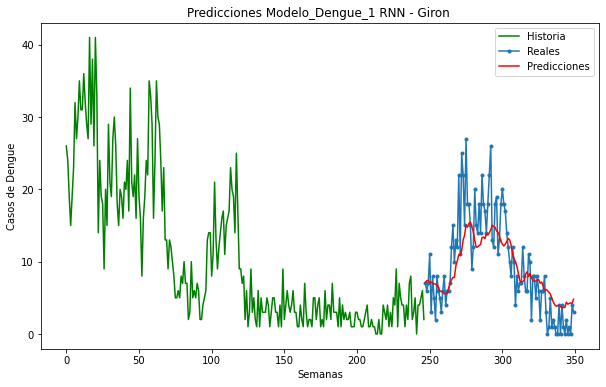

In [23]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_RNN)), y_train_inv_RNN.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_RNN), len(y_train_RNN) + len(y_test_RNN)), y_test_inv_RNN.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_RNN), len(y_train_RNN) + len(y_test_RNN)), y_pred_inv_RNN.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue_1 RNN - Giron ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

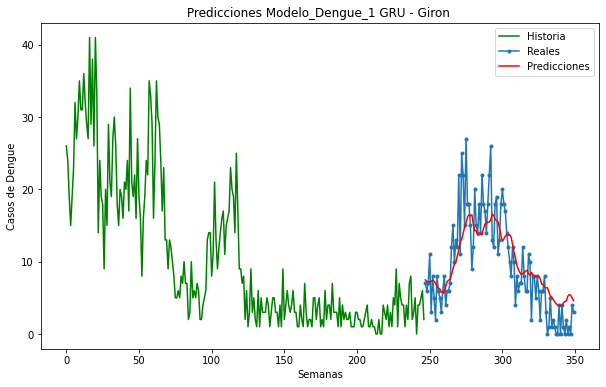

In [24]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_GRU)), y_train_inv_GRU.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_GRU), len(y_train_GRU) + len(y_test_GRU)), y_test_inv_GRU.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_GRU), len(y_train_GRU) + len(y_test_GRU)), y_pred_inv_GRU.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue_1 GRU - Giron ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

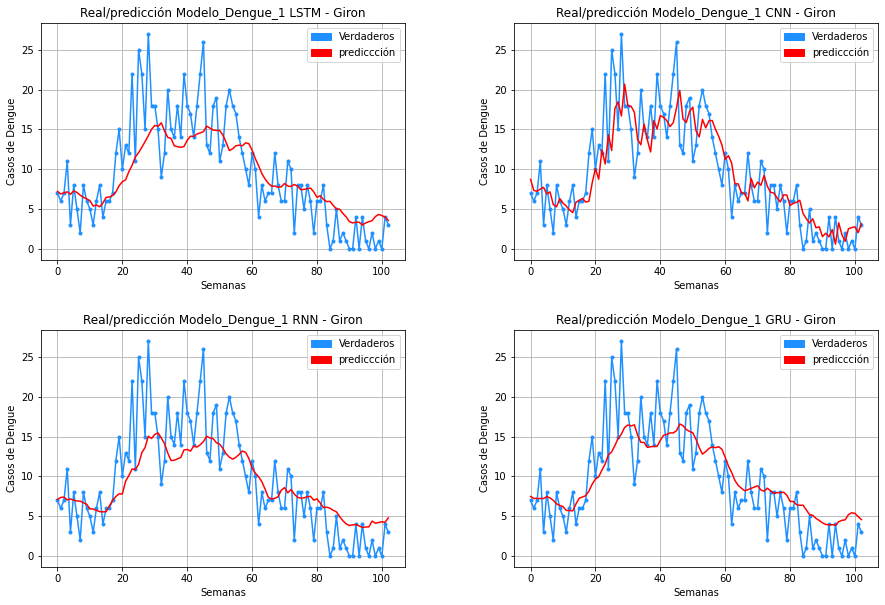

In [25]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
plt.title('Real/predicción Modelo_Dengue_1 LSTM - Giron' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_LSTM.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_LSTM.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.title('Real/predicción Modelo_Dengue_1 CNN - Giron' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_CNN.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_CNN.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.title('Real/predicción Modelo_Dengue_1 RNN - Giron' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_RNN.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_RNN.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.title('Real/predicción Modelo_Dengue_1 GRU - Giron' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_GRU.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_GRU.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.show()

In [26]:
score_LSTM = np.sqrt(metrics.mean_squared_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
score_CNN = np.sqrt(metrics.mean_squared_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
score_RNN = np.sqrt(metrics.mean_squared_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
score_GRU = np.sqrt(metrics.mean_squared_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

print("RMSE Modelo LSTM Dengue Giron : {}".format(score_LSTM))
print("RMSE Modelo CNN Dengue  Giron  : {}".format(score_CNN))
print("RMSE Modelo RNN Dengue  Giron  : {}".format(score_RNN))
print("RMSE Modelo GRU Dengue  Giron  : {}".format(score_GRU))

RMSE Modelo LSTM Dengue Giron : 4.137810238477149
RMSE Modelo CNN Dengue  Giron  : 3.7836815248400617
RMSE Modelo RNN Dengue  Giron  : 4.178815468781982
RMSE Modelo GRU Dengue  Giron  : 4.017409416528812


In [27]:
print("MSE Modelo LSTM Dengue Giron = ", mean_squared_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("MSE Modelo CNN Dengue  Giron   = ", mean_squared_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("MSE Modelo RNN Dengue  Giron  = ", mean_squared_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("MSE Modelo GRU Dengue  Giron   = ", mean_squared_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

MSE Modelo LSTM Dengue Giron =  17.121473569646323
MSE Modelo CNN Dengue  Giron   =  14.316245881416016
MSE Modelo RNN Dengue  Giron  =  17.46249872213158
MSE Modelo GRU Dengue  Giron   =  16.139578420014374


In [28]:
print("MAE Modelo LSTM Dengue Giron = ", mean_absolute_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("MAE Modelo CNN Dengue  Giron   = ", mean_absolute_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("MAE Modelo RNN Dengue  Giron  = ", mean_absolute_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("MAE Modelo GRU Dengue  Giron  = ", mean_absolute_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

MAE Modelo LSTM Dengue Giron =  3.0779606508977206
MAE Modelo CNN Dengue  Giron   =  2.848473275170743
MAE Modelo RNN Dengue  Giron  =  3.14696635551823
MAE Modelo GRU Dengue  Giron  =  3.0810300632587913


In [29]:
print("r2_score Modelo LSTM Dengue Giron  = ", r2_score(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("r2_score Modelo CNN Dengue  Giron  = ", r2_score(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("r2_score Modelo RNN Dengue  Giron  = ", r2_score(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("r2_score Modelo GRU Dengue  Giron  = ", r2_score(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

r2_score Modelo LSTM Dengue Giron  =  0.6167572936526757
r2_score Modelo CNN Dengue  Giron  =  0.679548796193893
r2_score Modelo RNN Dengue  Giron  =  0.6091238734427085
r2_score Modelo GRU Dengue  Giron  =  0.6387357847541302


In [30]:
print("explained_variance_score Modelo LSTM Dengue Giron  = ", explained_variance_score(y_test_inv_LSTM.flatten(), 
                                                                                           y_pred_inv_LSTM.flatten()))
print("explained_variance_score Modelo CNN Dengue  Giron  = ", explained_variance_score(y_test_inv_CNN.flatten(), 
                                                                                           y_pred_inv_CNN.flatten()))
print("explained_variance_score Modelo RNN Dengue  Giron  = ", explained_variance_score(y_test_inv_RNN.flatten(), 
                                                                                           y_pred_inv_RNN.flatten()))
print("explained_variance_score Modelo GRU Dengue  Giron  = ", explained_variance_score(y_test_inv_GRU.flatten(), 
                                                                                           y_test_inv_GRU.flatten()))

explained_variance_score Modelo LSTM Dengue Giron  =  0.6209332438753588
explained_variance_score Modelo CNN Dengue  Giron  =  0.679706125570522
explained_variance_score Modelo RNN Dengue  Giron  =  0.6155763821874143
explained_variance_score Modelo GRU Dengue  Giron  =  1.0


### VISUALIZACIÓN DE LOS VALORES TESTEADOS VS LAS PREDICCIONES

In [31]:
#MODELO LSTM
resultados_LSTM = pd.DataFrame({ 'Actuales':y_test_inv_LSTM.flatten(), 'Predicciones': y_pred_inv_LSTM.flatten()})
resultados_LSTM['diferencia'] = resultados_LSTM['Predicciones'] - resultados_LSTM['Actuales']
print(resultados_LSTM.head(5))
print(resultados_LSTM.tail(5))

   Actuales  Predicciones  diferencia
0       7.0      7.213852    0.213852
1       6.0      6.893343    0.893343
2       7.0      7.028910    0.028910
3      11.0      7.160568   -3.839432
4       3.0      6.847359    3.847359
     Actuales  Predicciones  diferencia
98        0.0      4.048465    4.048465
99        1.0      4.324564    3.324564
100       0.0      4.173960    4.173960
101       4.0      3.993354   -0.006646
102       3.0      3.562330    0.562330


In [32]:
#MODELO CNN
resultados_CNN = pd.DataFrame({ 'Actuales':y_test_inv_CNN.flatten(), 'Predicciones': y_pred_inv_CNN.flatten()})
resultados_CNN['diferencia'] = resultados_CNN['Predicciones'] - resultados_CNN['Actuales']
print(resultados_CNN.head(5))
print(resultados_CNN.tail(5))

   Actuales  Predicciones  diferencia
0       7.0      8.724438    1.724438
1       6.0      7.325006    1.325006
2       7.0      7.231997    0.231997
3      11.0      7.506827   -3.493173
4       3.0      7.723173    4.723173
     Actuales  Predicciones  diferencia
98        0.0      2.514248    2.514248
99        1.0      2.668392    1.668392
100       0.0      2.768196    2.768196
101       4.0      2.031366   -1.968634
102       3.0      3.160115    0.160115


In [33]:
#MODELO RNN
resultados_RNN = pd.DataFrame({ 'Actuales':y_test_inv_RNN.flatten(), 'Predicciones': y_pred_inv_RNN.flatten()})
resultados_RNN['diferencia'] = resultados_RNN['Predicciones'] - resultados_RNN['Actuales']
print(resultados_RNN.head(5))
print(resultados_RNN.tail(5))

   Actuales  Predicciones  diferencia
0       7.0      7.101810    0.101810
1       6.0      7.369182    1.369182
2       7.0      7.399513    0.399513
3      11.0      7.066521   -3.933479
4       3.0      7.173531    4.173531
     Actuales  Predicciones  diferencia
98        0.0      4.126960    4.126960
99        1.0      4.214549    3.214549
100       0.0      4.298870    4.298870
101       4.0      4.245342    0.245342
102       3.0      4.801199    1.801199


In [34]:
#MODELO GRU
resultados_GRU = pd.DataFrame({ 'Actuales':y_test_inv_GRU.flatten(), 'Predicciones': y_pred_inv_GRU.flatten()})
resultados_GRU['diferencia'] = resultados_GRU['Predicciones'] - resultados_GRU['Actuales']
print(resultados_GRU.head(5))
print(resultados_GRU.tail(5))

   Actuales  Predicciones  diferencia
0       7.0      7.486548    0.486548
1       6.0      7.241212    1.241212
2       7.0      7.249582    0.249582
3      11.0      7.231569   -3.768431
4       3.0      7.226561    4.226561
     Actuales  Predicciones  diferencia
98        0.0      5.211123    5.211123
99        1.0      5.439504    4.439504
100       0.0      5.368076    5.368076
101       4.0      4.952125    0.952125
102       3.0      4.583104    1.583104
